### **Daily Vegetables by Age Group**
#### Object ideas: Carrots
#### Dataset: RKI Dataset

In [15]:
title = 'Daily Vegetables by Age Group'
chart_id = 4

x_label = 'Age group'
y_label = 'Percent'

x_data = 'Altersgruppe'
y_data = 'Percent'

y_lower_limit = 0
y_upper_limit = 100

filter_var = 'ENgemDtgl'

In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../datasets/Gesundheit_in_Deutschland_aktuell_-_2019-2020-EHIS.csv')

data.head()

,Altersgruppe,Bildungsgruppe,Gender,Frequency,Freq_ges,Percent,LowerCL,UpperCL,Bundesland,Standard,Variable,BundeslandId
0,18 - 29 Jahre,Gesamt,Frauen,302,899,36.902,32.817,41.184,Deutschland,0,AMarztB,0
1,18 - 29 Jahre,Gesamt,Gesamt,561,2100,28.312,25.793,30.974,Deutschland,0,AMarztB,0
2,18 - 29 Jahre,Gesamt,Männer,254,1188,20.697,17.841,23.878,Deutschland,0,AMarztB,0
3,30 - 44 Jahre,Gesamt,Frauen,720,1895,38.012,34.983,41.136,Deutschland,0,AMarztB,0
4,30 - 44 Jahre,Gesamt,Gesamt,1229,3768,34.433,32.281,36.650,Deutschland,0,AMarztB,0


In [28]:
# Filter the data for physical activity variable
df = data[data['Variable'] == filter_var]

# Filter out the 'Gesamt' group and select only total gender
df = df[df['Altersgruppe'] != 'Gesamt']

# Only select the 'Gesamt' group for gender
df = df[df['Gender'] == 'Gesamt']

# Define the mapping for replacement
age_group_mapping = {
    '18 - 29 Jahre': '18 - 29 Years',
    '30 - 44 Jahre': '30 - 44 Years',
    '45 - 64 Jahre': '45 - 64 Years',
    '65 + Jahre': '65+ Years'
}

# Replace the values in the 'Altersgruppe' column using map
df['Altersgruppe'] = df['Altersgruppe'].map(age_group_mapping)

# Sample the data to verify the structure
df.head(10)

,Altersgruppe,Bildungsgruppe,Gender,Frequency,Freq_ges,Percent,LowerCL,UpperCL,Bundesland,Standard,Variable,BundeslandId
517,18 - 29 Years,Gesamt,Gesamt,1014,2100,47.023,44.238,49.827,Deutschland,0,ENgemDtgl,0
520,30 - 44 Years,Gesamt,Gesamt,2024,3766,47.866,45.604,50.137,Deutschland,0,ENgemDtgl,0
523,45 - 64 Years,Gesamt,Gesamt,4387,8976,42.810,41.304,44.328,Deutschland,0,ENgemDtgl,0
526,65+ Years,Gesamt,Gesamt,4027,7844,47.714,45.946,49.488,Deutschland,0,ENgemDtgl,0


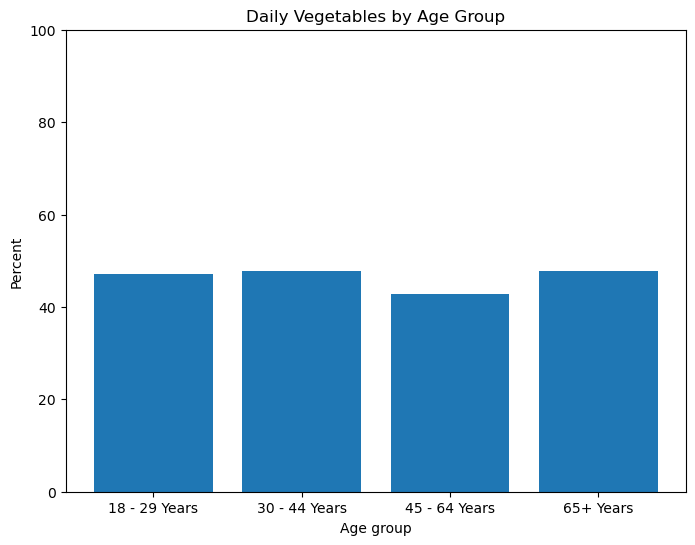

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for the palette

# Prepare data for plotting
age_group = df[x_data]
percent = df[y_data]

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting using the axes object
ax.bar(age_group, percent)
ax.set_ylim(y_lower_limit, y_upper_limit)  # Set y-axis limits

# Add labels using the axes object
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title(title)


# Save and show the figure
fig.savefig(f'0{chart_id}_chart.png')
plt.show()


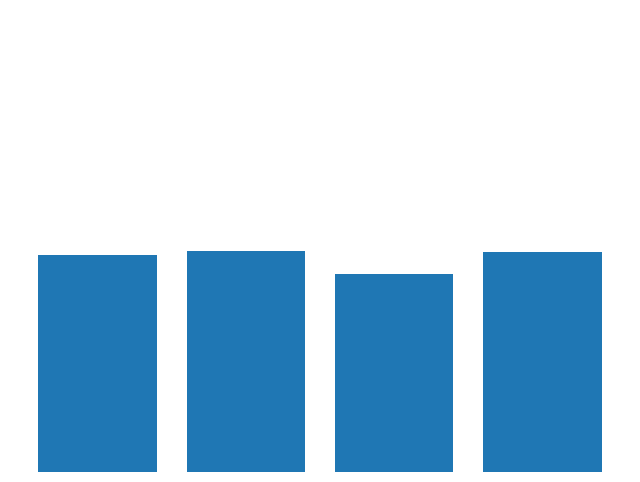

In [19]:
# Remove axes ticks and labels
fig.gca().axes.get_yaxis().set_visible(False)
fig.gca().axes.get_xaxis().set_visible(False)

# Remove spines
fig.gca().spines['top'].set_visible(False)
fig.gca().spines['right'].set_visible(False)
fig.gca().spines['bottom'].set_visible(False)
fig.gca().spines['left'].set_visible(False)

# Remove title
fig.gca().title.set_visible(False)

fig.savefig(f'0{chart_id}_bare_chart.png')

fig

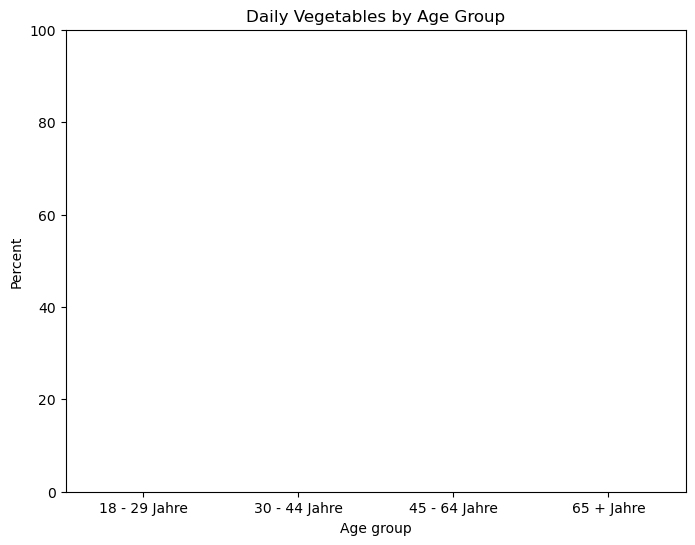

In [20]:
# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size for better fit

# Set the x-axis with explicit positioning for each group, simulate bar width by setting limits
ax.set_xlim(-0.5, len(df[x_data])-0.5)  # Adjusting xlim to reduce the empty space on sides

# Setting the x-ticks and labels explicitly for better control
ax.set_xticks(range(len(df[x_data])))
ax.set_xticklabels(df[x_data])

# Set y-axis limits
ax.set_ylim(y_lower_limit, y_upper_limit)

# Add labels using the axes object
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_title(title)

fig.savefig(f'0{chart_id}_chart_axes.png')

### Creating a mask for the chart

In [21]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def create_rectangular_mask(input_image_path, radius=5):
    # Load the image
    image = Image.open(input_image_path)
    image = image.convert("RGBA")  # Ensure image is in RGBA format to check for white pixels

    # Create a blank mask image with the same dimensions as the input image
    mask = Image.new('L', image.size, color=0)  # 'L' mode for black and white (luminance)
    draw = ImageDraw.Draw(mask)

    # Iterate over each pixel in the image
    for x in range(image.width):
        for y in range(image.height):
            r, g, b, a = image.getpixel((x, y))
            # Check if the pixel is not white; consider it non-white if any of the RGB values are not 255
            if r != 255 or g != 255 or b != 255:
                # Draw a circle of the specified radius around the non-white pixel
                draw.rectangle((x-radius, y-radius, x+radius, y+radius), fill=255)

    return image, mask

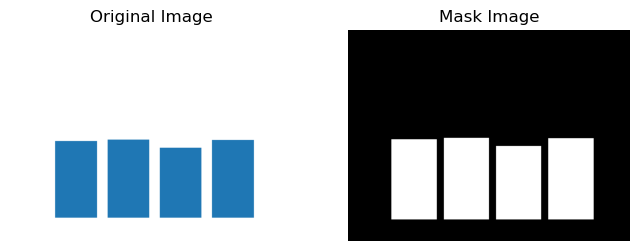

In [22]:
# Example usage
input_image_path = f'0{chart_id}_bare_chart.png'
original_image, mask_image = create_rectangular_mask(input_image_path,5)

# Display the original image and the mask side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mask_image, cmap='gray')
ax[1].set_title('Mask Image')
ax[1].axis('off')
plt.imsave(f'0{chart_id}_mask_chart.png', mask_image, cmap='gray')